# Import libs

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.random import default_rng
import matplotlib.pyplot as plt

# Keys(SIDs)

In [5]:
rng = default_rng(50)
keys = np.sort(rng.choice(1000, size=200, replace=False))
positions = np.arange(200)  # Corresponding positions
keys

array([  3,   4,  10,  12,  18,  24,  25,  32,  47,  52,  53,  54,  58,
        61,  62,  73,  76,  78,  79,  91,  92, 100, 103, 107, 109, 135,
       151, 154, 156, 166, 172, 180, 184, 189, 191, 195, 198, 200, 207,
       208, 209, 215, 218, 225, 228, 232, 235, 236, 240, 243, 247, 267,
       268, 271, 283, 287, 289, 290, 303, 311, 315, 323, 326, 327, 329,
       331, 346, 349, 350, 353, 365, 372, 373, 375, 376, 380, 383, 390,
       395, 396, 397, 399, 406, 413, 419, 421, 422, 428, 439, 441, 449,
       453, 455, 456, 458, 460, 462, 463, 465, 469, 472, 476, 480, 482,
       485, 495, 501, 503, 510, 514, 515, 517, 525, 532, 533, 535, 545,
       553, 565, 573, 575, 577, 582, 591, 594, 597, 600, 606, 613, 616,
       619, 625, 631, 633, 635, 637, 656, 661, 662, 663, 670, 672, 702,
       716, 719, 722, 737, 745, 762, 776, 782, 785, 786, 788, 793, 800,
       806, 808, 811, 813, 815, 816, 818, 819, 822, 826, 827, 828, 836,
       847, 850, 854, 860, 872, 884, 888, 894, 906, 908, 912, 91

# Learned Index (Naïve Approach)

In [6]:
model = LinearRegression()
temp_keys = keys
temp_positions = positions
model.fit(temp_keys.reshape(-1, 1), temp_positions.reshape(-1, 1))

LinearRegression()

In [7]:
naive_predictions = []
for i in range(len(temp_keys)):
    predicted_position = min(max(0, int(model.predict([[temp_keys[i]]])[0][0])), len(temp_keys) - 1)
    # predicted_position = min(max(0, model.predict([[temp_keys[i]]])[0][0]), len(temp_keys) - 1)
    naive_predictions.append(predicted_position)

# Learned Index (Recusive Model Index)

In [8]:
# First layer model: Divides the dataset into 'n_bins' segments
n_bins = 4
bin_size = len(keys) // n_bins
rmi = []
first_layer_model = []
second_layer_models = []
first_layer_positions = []
# prepare keys and pos for first layer
for i in range(n_bins):
    first_layer_positions.extend([i] * bin_size)
first_layer_positions = np.array(first_layer_positions)
model = LinearRegression()
model.fit(keys.reshape(-1, 1), first_layer_positions.reshape(-1, 1))
first_layer_model.append(model)

#train second layer models
for i in range(n_bins):
    start = i * bin_size
    end = (i + 1) * bin_size if i < n_bins - 1 else len(keys) 
    # Fit a linear regression model to this bin
    model = LinearRegression()
    model.fit(keys[start:end].reshape(-1, 1), positions[start:end].reshape(-1, 1))
    # print("{}-th model, key:{}, positions:{}".format(i, keys[start:end], positions[start:end]))
    second_layer_models.append(model)
    
rmi.append(first_layer_model)
rmi.append(second_layer_models)    

In [9]:
#collect predictions from rmi
rmi_predictions = []
for i in range(len(temp_keys)):
    # first_lay_predict_pos = min(max(0, rmi[0][0].predict([[temp_keys[i]]])[0][0]), n_bins - 1)
    first_lay_predict_pos = min(max(0, int(rmi[0][0].predict([[temp_keys[i]]])[0][0])), n_bins - 1)
    # second_lay_predict_pos = min(max(0, rmi[1][first_lay_predict_pos].predict([[temp_keys[i]]])[0][0]), len(temp_keys) - 1)
    second_lay_predict_pos = min(max(0, int(rmi[1][first_lay_predict_pos].predict([[temp_keys[i]]])[0][0])), len(temp_keys) - 1)
    rmi_predictions.append(second_lay_predict_pos)

In [10]:
naive_errors=0
rmi_errors=0
for i in range(len(temp_positions)):
    naive_errors += abs(temp_positions[i] - naive_predictions[i])
    rmi_errors += abs(temp_positions[i] - rmi_predictions[i])
print('Naive Approach Error Count:{}'.format(naive_errors / len(temp_positions)))
print('2 stage RMI Error Count:{}'.format(rmi_errors / len(temp_positions)))

Naive Approach Error Count:2.84
2 stage RMI Error Count:1.86


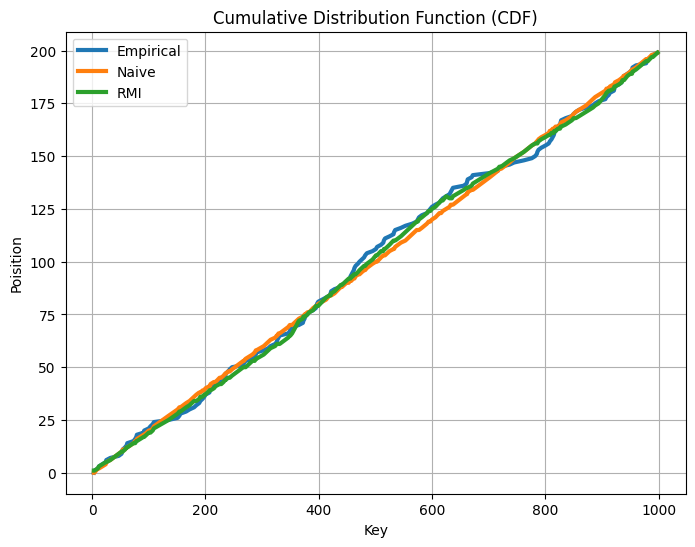

In [16]:
plt.figure(figsize=(8, 6))
cdf = np.arange(1, len(temp_keys) + 1) / len(temp_keys)
# plt.plot(temp_keys, cdf, linestyle='-', marker=None, label='empirical')  # Use marker=None for a smooth line
plt.plot(temp_keys, temp_positions, linestyle='-', marker=None, label='Empirical', linewidth=3)  # Use marker=None for a smooth line
plt.plot(temp_keys, naive_predictions, linestyle='-', marker=None, label='Naive', linewidth=3)  # Use marker=None for a smooth line
plt.plot(temp_keys, rmi_predictions, linestyle='-', marker=None, label='RMI', linewidth=3)  # Use marker=None for a smooth line
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Key')
plt.ylabel('Poisition')
plt.legend()
plt.grid(True)
plt.show()